# Test Jupyter Notebook
Sine wave in Gaussian white noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

Generate sine wave and Gaussian white noise

In [2]:
Fs, T = 1000, 10
N = Fs * T
t = np.linspace(0, T, N)
mu, sigma = 0.0, 1.0
x1 = np.random.normal(mu, sigma, N)
noisepower = np.dot(x1,x1) / N
A, fc = 1.0, 200.0
x = A*np.sin(2*np.pi*fc*t) + x1
snr = 10.0*np.log10((A**2/2) / noisepower)

Display sine wave with additive noise

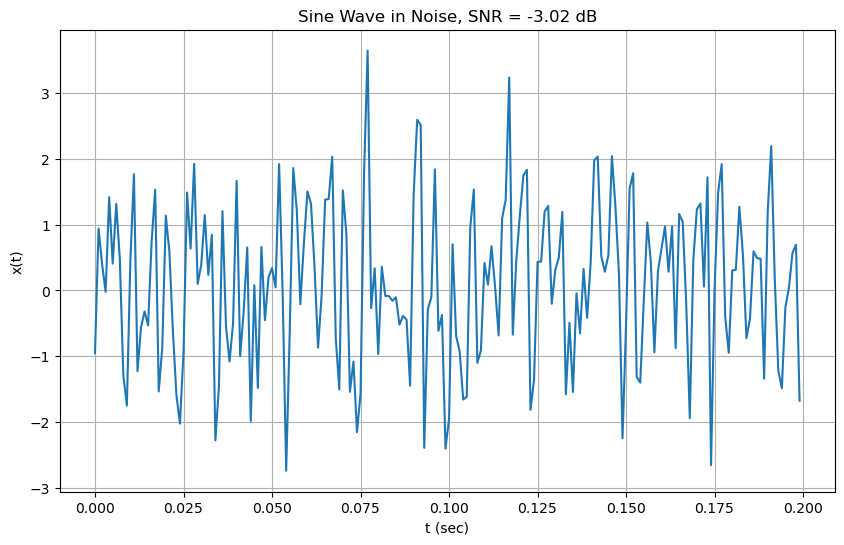

In [5]:
plt.figure(figsize=[10,6])
plt.plot(t[0:200],x[0:200])
plt.xlabel('t (sec)')
plt.ylabel('x(t)')
plt.title('Sine Wave in Noise, SNR = {:0.2f} dB'.
          format(snr))
plt.grid()

Estimate the Power Spectral Density of the sine wave signal with noise

In [6]:
NFFT = 2**10
f, Pxx = signal.welch(x,fs=Fs,window='hann',nperseg=NFFT,nfft=NFFT,
    detrend='constant',return_onesided=True,scaling='density')

Display the Power Spectral Density

Text(0.5, 1.0, 'Sine Wave in Noise - Power Spectral Density')

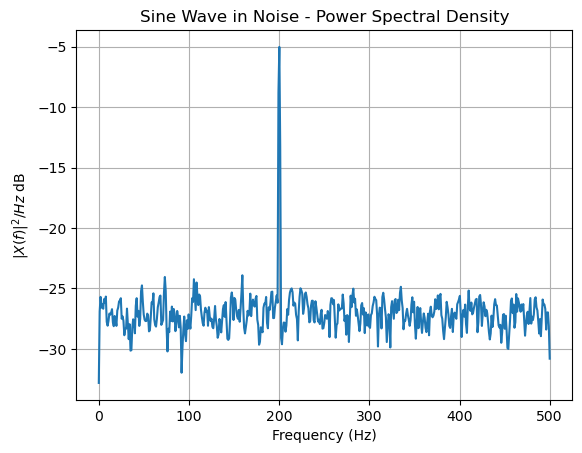

In [8]:
plt.figure()
#plt.semilogy(f, Pxx)
plt.plot(f,10*np.log10(Pxx))
#plt.ylim(-50,0)
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$|X(f)|^2 /Hz$ dB')
plt.title('Sine Wave in Noise - Power Spectral Density')

## That's All Folks